# 2nd Round Interview for Junior Data Scientist Position


## The Business Question: How we can detect bad end-users based on the information about their IP addresses?
    

How does this help Telesign? 
- Finding new and improved ways to utilize ip data efficiently can improve Telesign's fraud detection product, Score
- Add to Telesign's existing data 
- A more effective fraud detection product can help expand markets and businesses 

Tasks/Solutions: 
1. to analyze the quality of the IP data offered/presented in the sample TS Sample DS candidates.csv ; to perform comparative analysis of the two data sources in order to make conclusions about the accuracy of the data, i.e. to make the decision (if possible) which data source is the most accurate and recommended for the further research,

2. to conduct the research regarding the predictive power of the IP data (from the sample mentioned above) for the fraud detection problem (i.e. predictive power regarding the target variable fraud label),

3. to try to identify specific patterns in the end-user behavior based on the IP data presented in the three samples mentioned above.


Sources: https://medium.com/@polanitzer/fraud-detection-in-python-predict-fraudulent-credit-card-transactions-73992335dd90


## Libraries and settings

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['font.size'] = 15
random.seed(0)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


## Importing data and overview

In [3]:
# df_source1 = pd.read_csv('source1.csv')
# df_source1 = pd.read_csv('source2.csv')
df_main = pd.read_csv('TS_Sample_DS_candidates.csv', encoding='latin-1')

In [4]:
df_main.shape

(48474, 51)

In [5]:
df_main.head()

,fraud_label,utc_time_stamp,phone_number_hash,country_iso2,ip_address_hash,start_ip_source1,end_ip_source1,continent_source1,country_source1,country_code_source1,country_cl_source1,state_source1,state_cl_source1,city_source1,city_cl_source1,time_zone_source1,home_source1,connection_type_source1,line_speed_source1,ip_routing_type_source1,asn_source1,carrier_source1,organization_source1,organization_type_source1,sld_source1,tld_source1,hosting_facility_source1,anonymizer_status_source1,proxy_last_detected_source1,proxy_type_source1,proxy_level_source1,continent_source2,country_source2,country_code_source2,country_cl_source2,city_source2,city_cl_source2,time_zone_source2,connection_type_source2,asn_source2,carrier_source2,isp_source2,organization_source2,organization_type_source2,domain_source2,proxy_is_legitimate_source2,proxy_is_anonymous_source2,proxy_is_anonymous_vpn_source2,proxy_is_hosting_provider_source2,proxy_is_public_source2,proxy_is_tor_source2
0,legit,05/01/2017 00:00:04.493,a090dcb8615eb80cfc6782092a598352,US,88383218c90dd4b355399a8df04cd54d,66.87.76.76,66.87.76.79,north america,united states,us,0.99,illinois,0.95,chicago,0.90,-6,True,ocx,high,fixed,10507,sprint personal communications systems,sprint chicago pop,Internet Service Provider,spcsdns,net,False,NaN,NaN,NaN,NaN,North America,United States,US,0.99,Chicago,0.20,America/Chicago,Cellular,10507.0,Sprint Personal Communications Systems,Sprint PCS,Sprint PCS,cellular,spcsdns.net,0,0,0,0,0,0
1,fraud,05/01/2017 00:00:06.577,a6fbb057e5a85f6c9fea7216a84859dd,BR,730baa254a10bb2c8fb1c9e72ecbbdbe,186.237.158.116,186.237.158.135,south america,brazil,br,0.99,parana,0.80,cianorte,0.61,-3,NaN,NaN,NaN,NaN,263553,giganet internet e informatica,giganet internet e informatica,NaN,giganetinternet,com.br,False,NaN,NaN,NaN,NaN,South America,Brazil,BR,0.99,Cianorte,0.80,America/Sao_Paulo,Cable/DSL,263553.0,GIGANET INTERNET E INFORMATICA,Giganet Internet E Informatica,Giganet Internet E Informatica,residential,giganetinternet.com.br,0,0,0,0,0,0
2,legit,05/01/2017 00:05:03.850,9f8c3f5cae001698989cd4a691f4ef39,EG,e70a2957367afa9b34f9b3d734024949,41.217.160.0,41.217.173.255,africa,egypt,eg,0.86,al iskandariyah,0.68,al iskandariyah,0.50,2,NaN,dsl,medium,fixed,24863,linkdotnet,net@net dsl network,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,Africa,Egypt,EG,0.8,Tanta,0.80,Africa/Cairo,Cable/DSL,24863.0,LINKdotNET,Link Egypt,NET@NET DSL Network,residential,NaN,0,0,0,0,0,0
3,legit,05/01/2017 00:06:08.760,090e49e3dea4040855e84c7703721ca9,TW,226484c53a9b312420339f52a2e77729,39.12.0.0,39.12.47.255,asia,taiwan,tw,0.95,taipei,0.23,taipei,0.23,8,False,mobile wireless,low,mobile gateway,9674,far easttone telecommunication co.%2C ltd.,panchiao taipei hsien taiwan,Telecommunications,fetnet,net,False,NaN,NaN,NaN,NaN,Asia,Taiwan,TW,0.7,Taichung,0.01,Asia/Taipei,Cellular,9674.0,"Far EastTone Telecommunication Co., Ltd.",Far EasTone Telecommunication Co.,Far EastTone Telecommunication Co.,cellular,fetnet.net,0,0,0,0,0,0
4,fraud,05/01/2017 00:06:46.483,5d3c3aefe8f5d7ff62be7a79a30f7261,BR,90f7f57bfddc8744d9d7b1668b8679e3,170.79.211.36,170.79.211.39,south america,brazil,br,0.99,sao paulo,0.95,sao vicente,0.90,-3,NaN,NaN,NaN,NaN,52980,netion solu es em internet via r dio ltda.,netion solu es em internet via r dio ltda.,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,South America,Brazil,BR,0.99,Praia Grande,0.60,America/Sao_Paulo,Cable/DSL,52980.0,Netion Soluções em Internet Via Rádio Ltda.,Netion Soluções em Internet Via Rádio Ltda.,Netion Soluções em Internet Via Rádio Ltda.,residential,NaN,0,0,0,0,0,0


Let's seperate source1 features and source2 featurs into 2 different dataframes for further analysis

In [6]:
src1 = df_main.drop([col for col in df_main.columns if '_source2' in col], axis=1)
src2 = df_main.drop([col for col in df_main.columns if '_source1' in col], axis=1)

In [7]:
df_main.dtypes #all columns are clean 

fraud_label                           object
utc_time_stamp                        object
phone_number_hash                     object
country_iso2                          object
ip_address_hash                       object
start_ip_source1                      object
end_ip_source1                        object
continent_source1                     object
country_source1                       object
country_code_source1                  object
country_cl_source1                   float64
state_source1                         object
state_cl_source1                     float64
city_source1                          object
city_cl_source1                      float64
time_zone_source1                      int64
home_source1                          object
connection_type_source1               object
line_speed_source1                    object
ip_routing_type_source1               object
asn_source1                            int64
carrier_source1                       object
organizati

In [8]:
src1_features=src1.columns.to_list()
src2_features=src2.columns.to_list()

In [9]:
src1_features #31 features

['fraud_label',
 'utc_time_stamp',
 'phone_number_hash',
 'country_iso2',
 'ip_address_hash',
 'start_ip_source1',
 'end_ip_source1',
 'continent_source1',
 'country_source1',
 'country_code_source1',
 'country_cl_source1',
 'state_source1',
 'state_cl_source1',
 'city_source1',
 'city_cl_source1',
 'time_zone_source1',
 'home_source1',
 'connection_type_source1',
 'line_speed_source1',
 'ip_routing_type_source1',
 'asn_source1',
 'carrier_source1',
 'organization_source1',
 'organization_type_source1',
 'sld_source1',
 'tld_source1',
 'hosting_facility_source1',
 'anonymizer_status_source1',
 'proxy_last_detected_source1',
 'proxy_type_source1',
 'proxy_level_source1']

In [10]:
src2_features #25 features

['fraud_label',
 'utc_time_stamp',
 'phone_number_hash',
 'country_iso2',
 'ip_address_hash',
 'continent_source2',
 'country_source2',
 'country_code_source2',
 'country_cl_source2',
 'city_source2',
 'city_cl_source2',
 'time_zone_source2',
 'connection_type_source2',
 'asn_source2',
 'carrier_source2',
 'isp_source2',
 'organization_source2',
 'organization_type_source2',
 'domain_source2',
 'proxy_is_legitimate_source2',
 'proxy_is_anonymous_source2',
 'proxy_is_anonymous_vpn_source2',
 'proxy_is_hosting_provider_source2',
 'proxy_is_public_source2',
 'proxy_is_tor_source2']

src2 has less features than src1

In [11]:
#find common features between the two datasets 
src1_features_names=[name.replace('_source1','') for name in src1_features]
src2_features_names=[name.replace('_source2','') for name in src2_features]
common_list = set(src1_features_names).intersection(src2_features_names)
common_list = common_list - set(['fraud_label','utc_time_stamp','phone_number_hash','country_iso2','ip_address_hash'])

Set seperate numerical and categorical feats 

In [12]:
src1_numerical_feats = src1.describe().columns.to_list()
src1_categorical_feats = src1.drop(src1_numerical_feats, axis=1).columns.to_list()

In [13]:
src2_numerical_feats = src2.describe().columns.to_list()
src2_categorical_feats = src2.drop(src2_numerical_feats, axis=1).columns.to_list()

Group similar categorical and cotinous labels together 

In [14]:
#source1
src1_cl = ['country_cl_source1', 'state_cl_source1', 'city_cl_source1']

src1_date_time = ['utc_time_stamp', 'time_zone_source1', 
                  'proxy_last_detected_source1']

src1_ip_unique_id = ['phone_number_hash', 'ip_address_hash', 
                     'end_ip_source1',  'start_ip_source1',
                     'asn_source1', 'carrier_source1',
                     'organization_source1', 
                      'sld_source1', 'tld_source1', 
                     'country_iso2']

src1_categorical = ['country_code_source1', 'state_source1', 
                    'city_source1',
                    'country_source1','continent_source1',
                    'home_source1', 'connection_type_source1',
                    'line_speed_source1', 'ip_routing_type_source1', 
                    'carrier_source1', 'organization_type_source1',
                   'hosting_facility_source1','anonymizer_status_source1',
                   'proxy_type_source1','proxy_level_source1']

src1_target= ['fraud_label']

In [15]:
#src2
src2_cl = ['country_cl_source2','city_cl_source2']

src2_date_time = ['utc_time_stamp', 'time_zone_source2']

src2_ip_unique_id = ['phone_number_hash', 'country_iso2', 
                    'ip_address_hash', 'asn_source2', 
                    'carrier_source2', 'isp_source2', 'organization_source2',
                    'domain_source2']

src2_categorical = ['continent_source2', 'country_source2',
                   'country_code_source2', 'city_source2', 
                   'connection_type_source2', 'organization_type_source2',
                   'proxy_is_legitimate_source2',
                   'proxy_is_anonymous_source2',
                   'proxy_is_anonymous_vpn_source2',
                   'proxy_is_hosting_provider_source2',
                   'proxy_is_public_source2',
                   'proxy_is_tor_source2']

src2_target= ['fraud_label']

## Data Preprocessing

In [16]:
#turn all categorical names into lower case strings 
src1 = src1.applymap(lambda s: s.lower() if type(s) == str else s)
src2 = src2.applymap(lambda s: s.lower() if type(s) == str else s)

In [17]:
src1.replace({'#VALUE!': None}, inplace=True)
src2.replace({'#VALUE!': None}, inplace=True)

## Data Analysis

### First, let's conduct a basic analysis on data quality from both sources by assessing if the data is: 
    - complete : what are the null value counts for each feature of each data source?
    - unique : unique means there are no duplicates
    - timely : Is the data outdated? What is the time period range when the data was recorded? 
    - valid : Are values within column features valid? 

### Confidence interval analysis for both data sources for location features

In [18]:
src1[['country_cl_source1','state_cl_source1','city_cl_source1']].describe()

,country_cl_source1,state_cl_source1,city_cl_source1
count,48474.000000,48474.000000,48474.000000
mean,0.963325,0.764927,0.669679
std,0.066665,0.261903,0.250188
min,0.400000,0.000000,0.000000
25%,0.990000,0.740000,0.500000
50%,0.990000,0.870000,0.760000
75%,0.990000,0.950000,0.900000
max,0.990000,0.990000,0.990000


In [19]:
src2[['country_cl_source2','city_cl_source2']].describe(include='all')

,country_cl_source2,city_cl_source2
count,48474,42642.000000
unique,10,NaN
top,0.99,NaN
freq,41598,NaN
mean,NaN,0.475301
std,NaN,0.271796
min,NaN,0.000000
25%,NaN,0.300000
50%,NaN,0.500000
75%,NaN,0.700000


In [20]:
src2['country_cl_source2'].value_counts()

0.99       41598
0.9         3217
0.8         1310
0.7          812
0.6          541
0.5          465
0.4          344
0.3           94
#value!       90
0.85           3
Name: country_cl_source2, dtype: int64

[Data Quality Insight]: Source 2 has less information on geographic features (missing state information) and source 1 has a higher median of confidence levels for all three geographic locations. Which implies that we have less chance of being wrong about the locations of the ip address. 

### Null value count analysis for each datasource

In [21]:
#Are feature values complete? 
nan_count_src1 = src1.isna().sum() * 100/len(src1)
nan_count_src1.sort_values(ascending=False, inplace=True)
nan_count_src1

proxy_level_source1            91.422206
proxy_type_source1             91.422206
proxy_last_detected_source1    91.422206
anonymizer_status_source1      91.422206
sld_source1                    30.193506
tld_source1                    29.551925
organization_type_source1      23.220696
home_source1                   21.033956
line_speed_source1             13.677435
connection_type_source1        13.677435
ip_routing_type_source1        13.374180
state_source1                   1.322358
city_source1                    1.322358
carrier_source1                 0.412592
organization_source1            0.280563
country_iso2                    0.018567
hosting_facility_source1        0.000000
asn_source1                     0.000000
fraud_label                     0.000000
utc_time_stamp                  0.000000
city_cl_source1                 0.000000
state_cl_source1                0.000000
country_cl_source1              0.000000
country_code_source1            0.000000
country_source1 

In [22]:
nan_count_src2 = src2.isna().sum() * 100/len(src2)
nan_count_src2.sort_values(ascending=False, inplace=True)
nan_count_src2

domain_source2                       34.616495
city_cl_source2                      12.031192
city_source2                         12.029129
time_zone_source2                     1.604984
connection_type_source2               0.321822
country_code_source2                  0.202170
country_source2                       0.183604
continent_source2                     0.084581
carrier_source2                       0.039196
organization_type_source2             0.018567
country_iso2                          0.018567
asn_source2                           0.014441
proxy_is_hosting_provider_source2     0.000000
proxy_is_public_source2               0.000000
proxy_is_anonymous_source2            0.000000
proxy_is_legitimate_source2           0.000000
proxy_is_anonymous_vpn_source2        0.000000
fraud_label                           0.000000
organization_source2                  0.000000
isp_source2                           0.000000
utc_time_stamp                        0.000000
country_cl_so

[Data Quality]: For src1, the fact that > 90% of values are missing for proxy information is alarming at first, but actually provides us useful on how many transactions have used a proxy 

### Assessing common variables between two data sources

In [23]:
src1[[common_var+'_source1'for common_var in common_list]].isna().sum().sort_values(ascending=False)
#18863 total null values detected

organization_type_source1    11256
connection_type_source1       6630
city_source1                   641
carrier_source1                200
organization_source1           136
asn_source1                      0
time_zone_source1                0
city_cl_source1                  0
country_source1                  0
continent_source1                0
country_code_source1             0
country_cl_source1               0
dtype: int64

In [24]:
src2[[common_var+'_source2'for common_var in common_list]].isna().sum().sort_values(ascending=False)
#12950 total null values detected

city_cl_source2              5832
city_source2                 5831
time_zone_source2             778
connection_type_source2       156
country_code_source2           98
country_source2                89
continent_source2              41
carrier_source2                19
organization_type_source2       9
asn_source2                     7
country_cl_source2              0
organization_source2            0
dtype: int64

[Data Quality]: There are no alarming in amount missing values for each variable for src1 and src2. In fact, src1 and src2 could complement each other when the other has null values and vice versa
    
reference: https://pandas.pydata.org/pandas-docs/version/1.3.1/getting_started/intro_tutorials/09_timeseries.html

If we propose that src1 and src2 can compliment each other E.g used simultaneously in combination, then we should find out if their common features match up for each transaction

In [25]:
src1_common_vars = src1[[common_var+'_source1'for common_var in common_list]]
src2_common_vars = src2[[common_var+'_source2'for common_var in common_list]]
src1_common_vars.columns = common_list
src2_common_vars.columns = common_list

In [26]:
# src1_common_vars.compare(src1_common_vars, keep_equal=True).to_csv('same_column_analysis.csv')
compare_result=src1_common_vars.compare(src2_common_vars, keep_equal=True)

In [27]:
src1_common_vars.compare(src2_common_vars)

asn       time_zone                       connection_type             \
      self other      self                other             self      other   
0      NaN   NaN        -6      america/chicago              ocx   cellular   
1      NaN   NaN        -3    america/sao_paulo              NaN  cable/dsl   
2      NaN   NaN         2         africa/cairo              dsl  cable/dsl   
3      NaN   NaN         8          asia/taipei  mobile wireless   cellular   
4      NaN   NaN        -3    america/sao_paulo              NaN  cable/dsl   
...    ...   ...       ...                  ...              ...        ...   
48469  NaN   NaN        -3    america/sao_paulo              dsl  cable/dsl   
48470  NaN   NaN        -8  america/los_angeles               tx  corporate   
48471  NaN   NaN        -6  america/mexico_city              dsl  cable/dsl   
48472  NaN   NaN        -6      america/chicago  mobile wireless   cellular   
48473  NaN   NaN        -5       america/bogota              NaN  cable/dsl   

      city_cl       country       continent       country_code        \
         self other    self other      self other         self other   
0        0.90  0.20     NaN   NaN       NaN   NaN          NaN   NaN   
1        0.61  0.80     NaN   NaN       NaN   NaN          NaN   NaN   
2        0.50  0.80     NaN   NaN       NaN   NaN          NaN   NaN   
3        0.23  0.01     NaN   NaN       NaN   NaN          NaN   NaN   
4        0.90  0.60     NaN   NaN       NaN   NaN          NaN   NaN   
...       ...   ...     ...   ...       ...   ...          ...   ...   
48469    0.77  0.70     NaN   NaN       NaN   NaN          NaN   NaN   
48470    0.59  0.10     NaN   NaN       NaN   NaN          NaN   NaN   
48471    0.80  0.40     NaN   NaN       NaN   NaN          NaN   NaN   
48472    0.23  0.10     NaN   NaN       NaN   NaN          NaN   NaN   
48473    0.61   NaN     NaN   NaN       NaN   NaN          NaN   NaN   

                       city                \
                       self         other   
0                       NaN           NaN   
1                       NaN           NaN   
2           al iskandariyah         tanta   
3                    taipei      taichung   
4               sao vicente  praia grande   
...                     ...           ...   
48469              brasilia      brasília   
48470                   NaN           NaN   
48471  poza rica de hidalgo     tapachula   
48472                dallas        austin   
48473                bogota           NaN   

                                           carrier  \
                                              self   
0                                              NaN   
1                                              NaN   
2                                      linkdotnet    
3       far easttone telecommunication co.%2c ltd.   
4      netion solu  es em internet via r dio ltda.   
...                                            ...   
48469                                          NaN   
48470                                          NaN   
48471                                          NaN   
48472                           t-mobile usa  inc.   
48473                                          NaN   

                                                   country_cl        \
                                             other       self other   
0                                              NaN       0.99  0.99   
1                                              NaN       0.99  0.99   
2                                       linkdotnet       0.86   0.8   
3         far easttone telecommunication co., ltd.       0.95   0.7   
4      netion soluções em internet via rádio ltda.       0.99  0.99   
...                                            ...        ...   ...   
48469                                          NaN       0.99  0.99   
48470                                          NaN       0.60   0.9   
48471                                      

In [28]:
dict_ = {}
for feat in common_list: 
    compare_result=src1_common_vars[feat].compare(src2_common_vars[feat], keep_equal=True)
    dict_[feat] = len(compare_result)/len(src1)
    print(f"percentage of similar values for {feat} : {len(compare_result)/len(src1)}")
# agg_compare_result = pd.DataFrame(dict_, columns=['common_feature', 'percentage of similar values'])

agg_compare_result = pd.DataFrame.from_dict(dict_, orient='index').rename(columns={0: "similarity"}).sort_values(by='similarity',ascending=False)
                                    
agg_compare_result


percentage of similar values for asn : 0.015534100755043941
percentage of similar values for time_zone : 1.0
percentage of similar values for connection_type : 0.9984734084251351
percentage of similar values for city_cl : 0.9434748524982465
percentage of similar values for country : 0.04369352642653794
percentage of similar values for continent : 0.011490696043239676
percentage of similar values for country_code : 0.00468292280397739
percentage of similar values for city : 0.6427156826339894
percentage of similar values for carrier : 0.44258777901555474
percentage of similar values for country_cl : 1.0
percentage of similar values for organization_type : 0.9997318149936049
percentage of similar values for organization : 0.7842967363947684


,similarity
time_zone,1.000000
country_cl,1.000000
organization_type,0.999732
connection_type,0.998473
city_cl,0.943475
organization,0.784297
city,0.642716
carrier,0.442588
country,0.043694
asn,0.015534


Some rows would not be viable for replacement because same categories values are different, we might not know which is the right value for each feature  

### Time Series analysis 

In [29]:
#Is data timely? 
#Split time data into 'Dates' and 'Time' columns 
src1['Date'] = pd.to_datetime(src1['utc_time_stamp']).dt.date
src1['Time'] = pd.to_datetime(src1['utc_time_stamp']).dt.time

In [30]:
src2['Date'] = pd.to_datetime(src2['utc_time_stamp']).dt.date
src2['Time'] = pd.to_datetime(src2['utc_time_stamp']).dt.time

In [31]:
src1['fraud_label'] = src1['fraud_label'].replace({'legit':0, 'fraud':1})
src2['fraud_label'] = src2['fraud_label'].replace({'legit':0, 'fraud':1})

Text(0, 0.5, 'fraud cases')

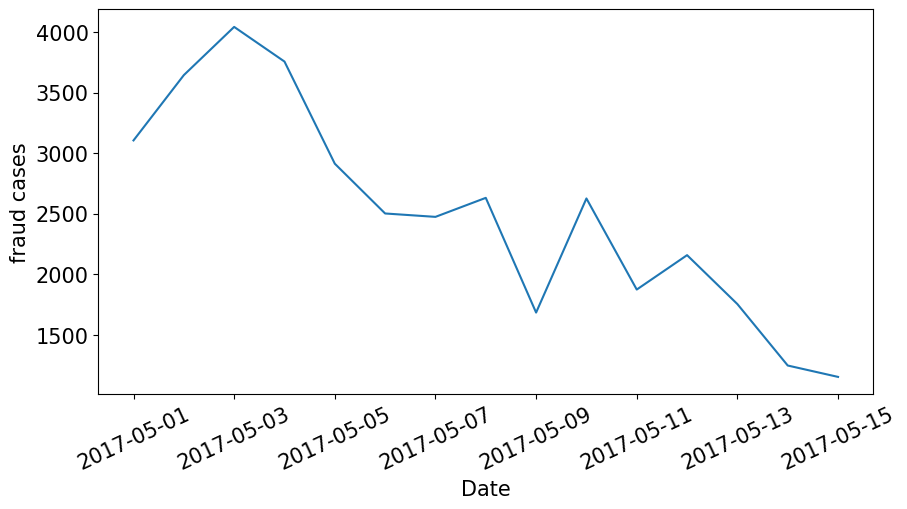

In [32]:
timeline_src1 = src1.groupby('Date').sum().reset_index()
timeline_src1['fraud_ratio'] = ((timeline_src1['fraud_label']/len(src1)) * 100)
ax = sns.lineplot(x='Date', y='fraud_label',data=timeline_src1 )
plt.xticks(rotation=25)
plt.ylabel('fraud cases')

In [33]:
timeline_src1['Date'].unique() #8 different dates presented in the data (data encompasses a week's time period)

array([datetime.date(2017, 5, 1), datetime.date(2017, 5, 2),
       datetime.date(2017, 5, 3), datetime.date(2017, 5, 4),
       datetime.date(2017, 5, 5), datetime.date(2017, 5, 6),
       datetime.date(2017, 5, 7), datetime.date(2017, 5, 8),
       datetime.date(2017, 5, 9), datetime.date(2017, 5, 10),
       datetime.date(2017, 5, 11), datetime.date(2017, 5, 12),
       datetime.date(2017, 5, 13), datetime.date(2017, 5, 14),
       datetime.date(2017, 5, 15)], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '00:00:04.493000'),
  Text(1, 0, '00:00:06.577000'),
  Text(2, 0, '00:05:03.850000'),
  Text(3, 0, '00:06:08.760000'),
  Text(4, 0, '00:06:46.483000'),
  Text(5, 0, '00:09:19.930000'),
  Text(6, 0, '00:09:22.580000'),
  Text(7, 0, '00:09:27.537000'),
  Text(8, 0, '00:10:16.407000'),
  Text(9, 0, '00:10:24.517000'),
  Text(10, 0, '00:13:13.463000'),
  Text(11, 0, '00:13:55.937000'),
  Text(12, 0, '00:14:29.867000'),
  Text(13, 0, '00:14:39.937000'),
  Text(14, 0, '00:15:27.933000')])

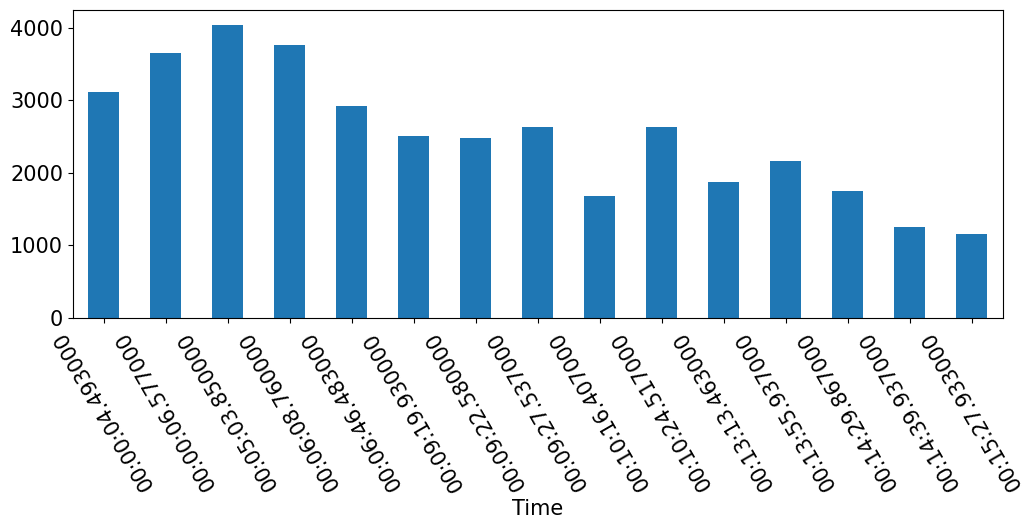

In [34]:
#What are the average fraud transactions for each time stamp of the day?   
fig, axs = plt.subplots(figsize=(12, 4))  
timeline_src1.groupby(src1["Time"])['fraud_label'].mean().plot(kind='bar', rot=0, ax=axs)
plt.xticks(rotation=120)

[User Behaviour]: In general, fraud transactions are maximum at 00:06 UTC time and minium at 00:10 UTC time. Fraud generally happens in eralier UTC hours 

### Outlier analysis for continous features for both data sources [FOR REFERENCE ONLY]

Since most variables are categorical, we need another way to analyze outliers 

In [35]:
# src1_outlier = src1.drop(src1_cl, axis=1)
# src1_outlier = src1_outlier.drop(src1_date_time, axis=1)
# src1_outlier = src1_outlier.drop(src1_ip_unique_id, axis=1)

In [36]:
# src2_outlier = src2.drop(src2_cl, axis=1)
# src2_outlier = src2_outlier.drop(src2_date_time, axis=1)
# src2_outlier = src2_outlier.drop(src2_ip_unique_id, axis=1)

In [37]:
#Use IQR technique for detecting outliers 
# def get_num_outliers (column):
#     q1 = np.percentile(column, 25)
#     q3 = np.percentile(column, 75)
#     return sum((column<q1) | (column>q3))

In [38]:
# src1_outlier.groupby('fraud_label').agg([get_num_outliers])

In [39]:
# def remove_outlier_IQR(df):
#     Q1=df.quantile(0.25)
#     Q3=df.quantile(0.75)
#     IQR=Q3-Q1
#     df_outlier=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
#     return df_removed_outlier

#How many outliers in numerical values? Let's use IQR technique to find out
# src1['fraud_label'] = src1['fraud_label'].replace({0:'legit', 1:'fraud'})
# src1_numerical_feat = ['country_cl_source1', 'state_cl_source1', 'city_cl_source1', 'time_zone_source1', 'asn_source1']

# dict_outliers_src1 = {}
# for feat in src1_numerical_feat:
#     df_outlier_removed = remove_outlier_IQR(src1[feat])
#     ind_diff = src1.index.difference(df_outlier_removed.index)
#     dict_outliers_src1[feat] = len(src1) - len(df_outlier_removed)
#     pd_outlier_count_src1 = pd.DataFrame(list(dict_outliers_src1.items()), columns=['feature', '# of outliers'])
# pd_outlier_count_src1.sort_values(ascending=False, by='# of outliers')

In [40]:
#Boxplot visualization
# plt.rcParams["figure.autolayout"] = True

# src1['fraud_label'] = src1['fraud_label'].replace({0:'legit', 1:'fraud'})
# src1_numerical_feat = ['country_cl_source1', 'state_cl_source1', 'city_cl_source1', 'time_zone_source1', 'asn_source1']
# src1_numerical_feat1 = ['country_cl_source1', 'state_cl_source1', 'city_cl_source1']
# src1.boxplot(column=src1_numerical_feat1, by='fraud_label')
# plt.xticks(rotation=90)

# for feat in src1_numerical_feat: 
#     src1.boxplot(column=feat, by='fraud_label')
#     outliers = [flier.get_ydata() for flier in bp["fliers"]]
#     boxes = [box.get_ydata() for box in bp["boxes"]]
#     medians = [median.get_ydata() for median in bp["medians"]]
#     whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

#     print("Outliers: ", outliers)
#     print("Boxes: ", boxes)
#     print("Medians: ", medians)
#     print("Whiskers: ", whiskers)

In [41]:
# plt.rcParams["figure.autolayout"] = True

# src2['fraud_label'] = src2['fraud_label'].replace({0:'legit', 1:'fraud'})
# src2_num_feats = src2.describe().columns.to_list()
# src2.boxplot(column=src2_num_feats, by='fraud_label')
# plt.xticks(rotation=90)

Let's check if there is any data leakage in any of the two sources. Data leakage refers to a mistake that is made by the creator of a machine learning model in which information about the target variable is leaking into the input of the model during the training of the model; information that will not be available in the ongoing data that we would like to predict on.

Unlike over-fitting that we can detect by measuring the differences between the train-validation evaluation metric, data leakage is much more difficult to detect since both your train & validation can achieve great results but the results on the ongoing data will be drastically lower. Identifying the leakage once the model is already deployed in your production environment is not ideal. It would be much for us to identify it in the development stage.



Data Leakage explanation and sources: https://jfrog.com/community/data-science/be-careful-from-data-leakage-2/#:~:text=Data%20leakage%20refers%20to%20a,would%20like%20to%20predict%20on.

Why is data leakage bad? 

### Check for data leakage in numerical features 

In [42]:
src1_feat_distribution = src1.copy()
src2_feat_distribution = src2.copy()

In [43]:
src1_feat_distribution = src1.drop(src1_cl, axis=1)
src1_feat_distribution = src1_feat_distribution.drop(src1_date_time, axis=1)
src1_feat_distribution = src1_feat_distribution.drop(src1_ip_unique_id, axis=1)

In [44]:
src1_feat_distribution.head(2)

,fraud_label,continent_source1,country_source1,country_code_source1,state_source1,city_source1,home_source1,connection_type_source1,line_speed_source1,ip_routing_type_source1,organization_type_source1,hosting_facility_source1,anonymizer_status_source1,proxy_type_source1,proxy_level_source1,Date,Time
0,0,north america,united states,us,illinois,chicago,True,ocx,high,fixed,internet service provider,False,NaN,NaN,NaN,2017-05-01,00:00:04.493000
1,1,south america,brazil,br,parana,cianorte,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,2017-05-01,00:00:06.577000


In [45]:
src1_feat_distribution.columns.to_list()

['fraud_label',
 'continent_source1',
 'country_source1',
 'country_code_source1',
 'state_source1',
 'city_source1',
 'home_source1',
 'connection_type_source1',
 'line_speed_source1',
 'ip_routing_type_source1',
 'organization_type_source1',
 'hosting_facility_source1',
 'anonymizer_status_source1',
 'proxy_type_source1',
 'proxy_level_source1',
 'Date',
 'Time']

In [46]:
src2_feat_distribution = src2.drop(src2_cl, axis=1)
src2_feat_distribution = src2_feat_distribution.drop(src2_date_time, axis=1)
src2_feat_distribution = src2_feat_distribution.drop(src2_ip_unique_id, axis=1)

In [47]:
src2_feat_distribution.head(2)

,fraud_label,continent_source2,country_source2,country_code_source2,city_source2,connection_type_source2,organization_type_source2,proxy_is_legitimate_source2,proxy_is_anonymous_source2,proxy_is_anonymous_vpn_source2,proxy_is_hosting_provider_source2,proxy_is_public_source2,proxy_is_tor_source2,Date,Time
0,0,north america,united states,us,chicago,cellular,cellular,0,0,0,0,0,0,2017-05-01,00:00:04.493000
1,1,south america,brazil,br,cianorte,cable/dsl,residential,0,0,0,0,0,0,2017-05-01,00:00:06.577000


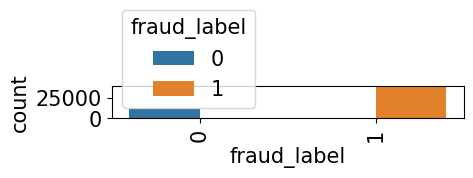

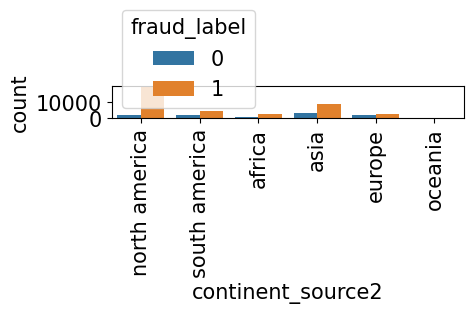

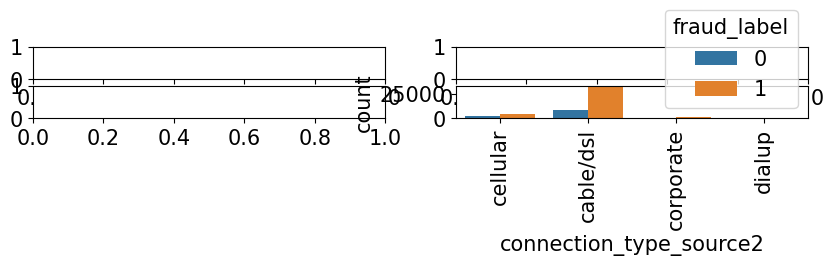

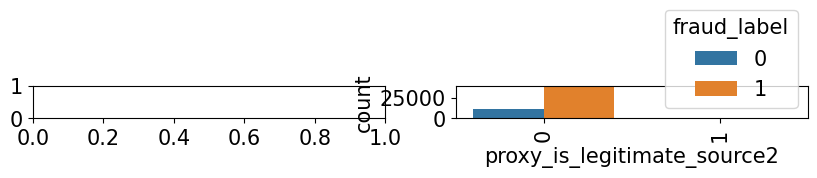

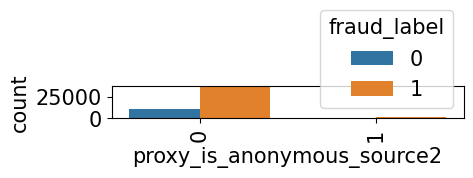

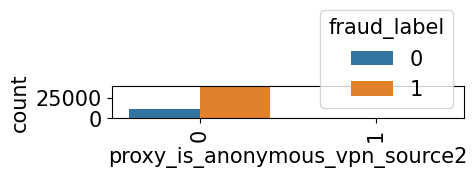

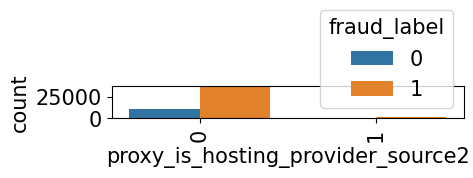

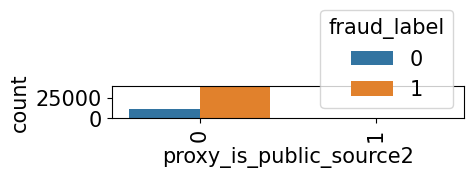

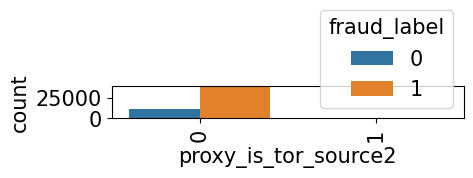

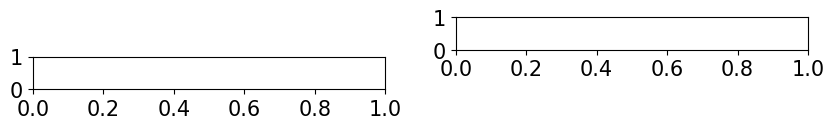

In [48]:
#src2
for n, feat in enumerate(src2_feat_distribution):
    ax = plt.subplot(10, 2, n + 1)
    if len(src2_feat_distribution[feat].unique()) < 10:
        sns.countplot(x=src2_feat_distribution[feat], hue= src2_feat_distribution['fraud_label'], ax=ax )
        plt.xticks(rotation = 90)
        plt.show()

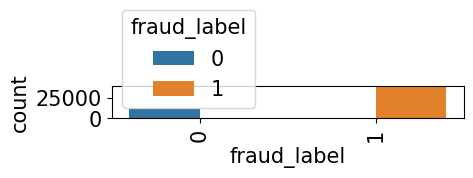

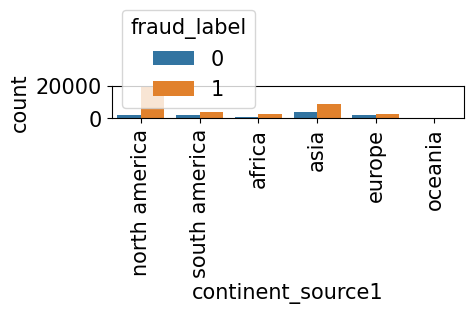

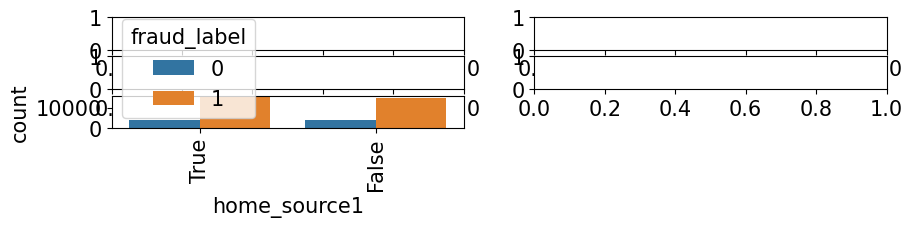

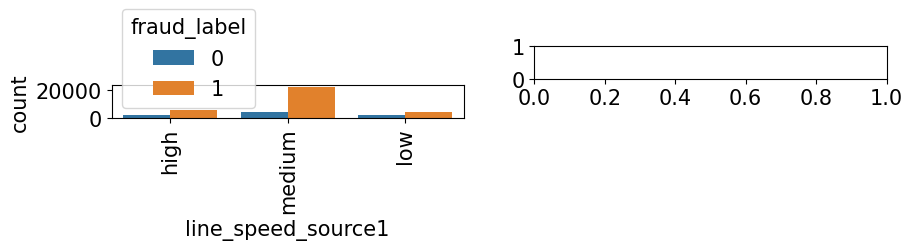

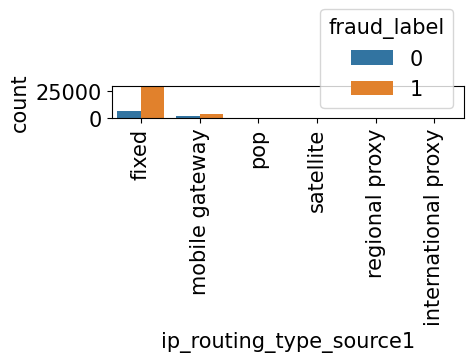

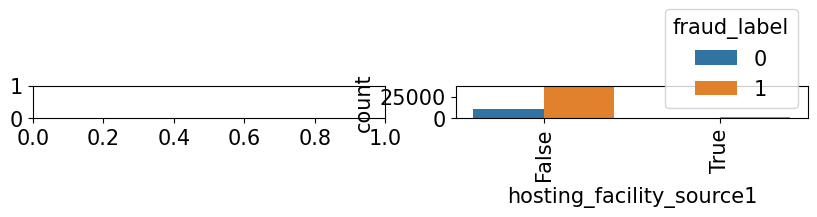

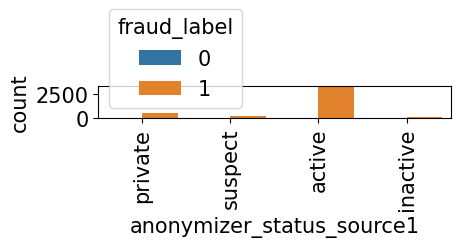

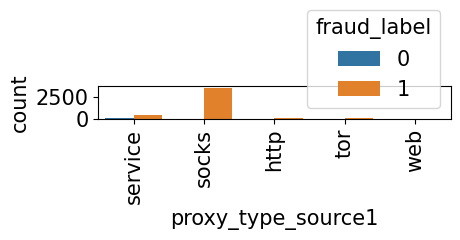

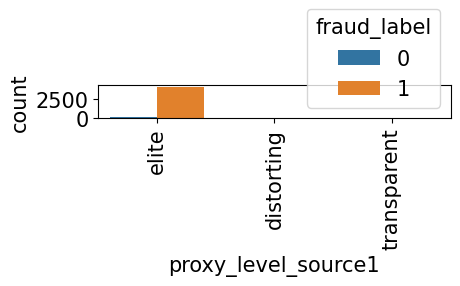

['fraud_label', 'continent_source1', 'home_source1', 'line_speed_source1', 'ip_routing_type_source1', 'hosting_facility_source1', 'anonymizer_status_source1', 'proxy_type_source1', 'proxy_level_source1']


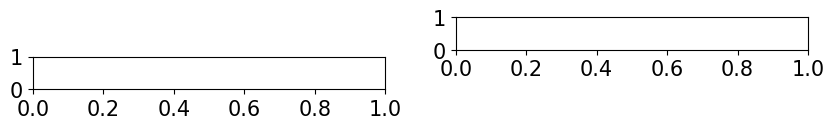

In [49]:
#src1
features_plotted=[]
for n, feat in enumerate(src1_feat_distribution):
    ax = plt.subplot(10, 2, n + 1)
    if len(src1_feat_distribution[feat].unique()) < 10:
        features_plotted.append(feat)
        sns.countplot(x=src1_feat_distribution[feat], hue= src1_feat_distribution['fraud_label'], ax=ax )
        plt.xticks(rotation = 90)
        plt.show()
print(features_plotted)

In [50]:
# for n, feat in enumerate(src1_feat_distribution):
#     ax = plt.subplot(3, 2, n + 1)
#     print(f"feature that we are at: {feat}")
#     src1_bin = src1_feat_distribution.fraud_label.count()
#     src1_bin.plot(kind='bar', ax=ax)


In [51]:
#Check if there's are any data leakage in each of the sources, by binning contiounous vars from each d
#datasource 
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
# plt.subplots_adjust(hspace=0.5)

# for n, feat in enumerate(src1_feat_distribution_num):
#     ax = plt.subplot(3, 2, n + 1)
#     print(f"feature that we are at: {feat}")
#     src1_feat_distribution[feat + '_bins'] = pd.cut(src1_feat_distribution_cat[feat], 7) # ADDS BINS, MODIFIES SRC1...
#     src1_bin = src1_feat_distribution.groupby(feat + '_bins').fraud_label.count()
#     src1_bin.plot(kind='bar', ax=ax)
# #     print(src1_bin)

In [52]:
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
# plt.subplots_adjust(hspace=0.5)

# for n, feat in enumerate(src2_numerical_feats):
#     ax = plt.subplot(5, 2, n + 1)
#     src2_feat_distribution[feat + '_bins'] = pd.cut(src2_feat_distribution[feat], 7)
#     src2_bin = src2_feat_distribution.groupby(feat + '_bins').fraud_label.count()
#     src2_bin.plot(kind='bar', ax=ax)
# #     print(src1_bin)

In [53]:
for feat in src1[src1_categorical_feats]:
    s = src1[feat].groupby(src1['fraud_label']).value_counts()
    print(s)

fraud_label  fraud_label
0            0              10896
1            1              37578
Name: fraud_label, dtype: int64
fraud_label  utc_time_stamp         
0            05/01/2017 00:00:04.493    1
             05/01/2017 00:05:03.850    1
             05/01/2017 00:06:08.760    1
             05/01/2017 00:09:19.930    1
             05/01/2017 00:14:29.867    1
                                       ..
1            05/15/2017 23:43:06.567    1
             05/15/2017 23:52:38.470    1
             05/15/2017 23:55:36.477    1
             05/15/2017 23:55:56.510    1
             05/15/2017 23:57:49.883    1
Name: utc_time_stamp, Length: 48469, dtype: int64
fraud_label  phone_number_hash               
0            459d606dd028bf805b308039fa9f8c70    7
             9208c7b2722e4cbba8beef5a53238f6c    7
             cef33d6e8995345caba30540fcef2e6c    7
             477da4fca7ab8f787263156450f27c10    6
             0cff95c697e436ec3d0a3fdd107c1bb3    5
                         

In [54]:
for feat in src2[src2_categorical_feats]:
    s = src2[feat].groupby(src2['fraud_label']).value_counts(normalize=True)
    print(s)

fraud_label  fraud_label
0            0              1.0
1            1              1.0
Name: fraud_label, dtype: float64
fraud_label  utc_time_stamp         
0            05/01/2017 00:00:04.493    0.000092
             05/01/2017 00:05:03.850    0.000092
             05/01/2017 00:06:08.760    0.000092
             05/01/2017 00:09:19.930    0.000092
             05/01/2017 00:14:29.867    0.000092
                                          ...   
1            05/15/2017 23:43:06.567    0.000027
             05/15/2017 23:52:38.470    0.000027
             05/15/2017 23:55:36.477    0.000027
             05/15/2017 23:55:56.510    0.000027
             05/15/2017 23:57:49.883    0.000027
Name: utc_time_stamp, Length: 48469, dtype: float64
fraud_label  phone_number_hash               
0            459d606dd028bf805b308039fa9f8c70    0.000642
             9208c7b2722e4cbba8beef5a53238f6c    0.000642
             cef33d6e8995345caba30540fcef2e6c    0.000642
             477da4fca7ab8f78

Conclusion: I don't see an obvious indication of data leakage, therefore we can proceed to modeling

## Checking for high correlations between variables [FOR REFERENCE ONLY]

In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Depending on the features and the model, correlated features might not always harm the performance of the model but that is a real risk.

In [55]:
# src1_corr = src1[src1_numerical_feats].corr()
# src2_corr = src2[src2_numerical_feats].corr()

In [56]:
# src1_corr

In [57]:
# sns.heatmap(src1_corr)

In [58]:
# sns.heatmap(src2_corr)

In [59]:
# src2_corr

## Check fraud ratio for whole dataset


fraud ratio for dataset
1    0.77522
0    0.22478
Name: fraud_label, dtype: float64


<AxesSubplot: >

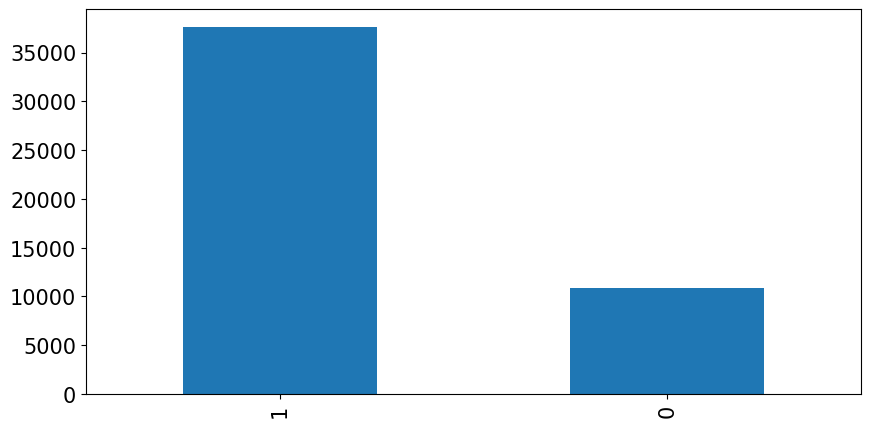

In [60]:
#What is the fraud ratio for the whole dataset? 
print("\nfraud ratio for dataset")
print(src1['fraud_label'].value_counts(normalize=True))
src1['fraud_label'].value_counts().plot(kind='bar')

Data is imbalanced

## Feature Engineering

Feature Engineering tutorials: 
   
1. Get rid correlated variables or combine then (E.g. country, country-code, city, state)
    - https://github.com/rasgointelligence/feature-engineering-tutorials
    - https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-velocity-acceleration.ipynb


2. Engineer features such as ip address velocity, address velocity, phone number vacancy and plot fraud ratios for them: https://www.chargebackgurus.com/blog/velocity-checks

3. Check to see when # of null values can be considered a feature 




In [61]:
src1.columns.to_list()

['fraud_label',
 'utc_time_stamp',
 'phone_number_hash',
 'country_iso2',
 'ip_address_hash',
 'start_ip_source1',
 'end_ip_source1',
 'continent_source1',
 'country_source1',
 'country_code_source1',
 'country_cl_source1',
 'state_source1',
 'state_cl_source1',
 'city_source1',
 'city_cl_source1',
 'time_zone_source1',
 'home_source1',
 'connection_type_source1',
 'line_speed_source1',
 'ip_routing_type_source1',
 'asn_source1',
 'carrier_source1',
 'organization_source1',
 'organization_type_source1',
 'sld_source1',
 'tld_source1',
 'hosting_facility_source1',
 'anonymizer_status_source1',
 'proxy_last_detected_source1',
 'proxy_type_source1',
 'proxy_level_source1',
 'Date',
 'Time']

In [62]:
#Take only features we need 
src1_final = src1.copy()

#Take out correlated variables like city and state to avoid multi-collinearity
src1_feats_to_include= ['fraud_label',
 'city_source1',
 'home_source1',
 'connection_type_source1',
 'line_speed_source1',
 'ip_routing_type_source1',
 'organization_type_source1',
 'hosting_facility_source1',
 'anonymizer_status_source1',
 'proxy_type_source1',
 'proxy_level_source1',
 'ip_address_hash',
 'phone_number_hash'
 ]

src1_final = src1[src1_feats_to_include]

In [63]:
src2_final = src2.copy()

src2_feats_to_include = ['fraud_label', 'city_source2', 'connection_type_source2',
       'organization_type_source2', 'proxy_is_legitimate_source2',
       'proxy_is_anonymous_source2', 'proxy_is_anonymous_vpn_source2',
       'proxy_is_hosting_provider_source2', 'proxy_is_public_source2',
       'proxy_is_tor_source2', 'ip_address_hash', 'phone_number_hash']
src2_final = src2_final[src2_feats_to_include]

In [64]:
#Engineer velocity features 

# ip_velocity = df_main.groupby(['ip_address_hash'])
# ip_velocity = ip_velocity['ip_address_hash'].value_counts()
# ip_velocity
  
ip_velocity_src1 = src1_final.groupby(['ip_address_hash', 'fraud_label']).size()
ip_velocity_src1 =ip_velocity_src1.reset_index().rename(columns={0:'count'})
ip_velocity_src1.sort_values(by='count', ascending=False).head(30)

#this plotting takes a really long time 
# colors = {'fraud':'red', 'legit':'green'}
# plt.scatter(ip_velocity['ip_address_hash'], ip_velocity['fraud_label'], c=ip_velocity['fraud_label'].map(colors))
# ip_velocity.columns.to_list()
# sns.countplot(data=ip_velocity, x=ip_velocity['ip_address_hash'], hue=ip_velocity['fraud_label'])



,ip_address_hash,fraud_label,count
19016,e5053381f66537df385a1a11fbbd9249,1,28
13854,a6ebccb0fd84ba0d703838aa2c7d3470,1,27
11625,8b9c43b9efcd6d2e429b6cdef7ac4a27,1,26
4329,35007c1fd496fb1c71d0a547fe22b3cd,1,26
7770,5d89d8d1f9a16ebce753b36a299e884e,1,26
511,0657c3b811489103771e813751d82e1f,1,25
3636,2c9bcec1b9fa02dd4f07c590e4e285a6,1,25
425,058b5b49f45c1c9d778ca7b435a05467,1,25
20333,f51d0c574ded165e26532e8242bc1265,1,24
11977,90198d512b58ef4fe44c62c85692a522,1,24


It's clear to me here that a high ip velocity over a one week (8 day) time frame is very indicative of fraud. This makes sense because fraudsters will most likely try to max out their attempts using the same ip address

In [65]:
#phone number velocity: 
pn_velocity_src1 = src1_final.groupby(['phone_number_hash', 'fraud_label']).size()
pn_velocity_src1 =pn_velocity_src1.reset_index().rename(columns={0:'count'})
pn_velocity_src1.sort_values(by='count', ascending=False).head(30)


,phone_number_hash,fraud_label,count
8140,6299995ad8aefcf8a6870ee7e5d3f221,1,20
1587,12cf91042ffd4fc8cf215dd93c0c056d,1,20
20300,f9651a2bf84684e76c65ed47ae274022,1,20
3965,30a4bb013a28a360fcc71ae3327af65f,1,19
15692,bff3c7aecfc6b64369559bb2890458c9,1,18
15667,bf806874cce73d4636a56bc90b5b9f3c,1,18
6097,4a127a2f5d023941a2d8a3125eb919ec,1,18
18293,e0515524f881f97ed6b6d7b42e7d3833,1,18
1488,11a1c95fe9a7028f78ad3577612c35af,1,17
1936,170b0b5c65416f77defc0a8afb23dc8b,1,17


Same thing with a high phone number velocity = indicative of fraud

In [66]:
#Engineer ip address velocity features 

ip_velocity = src1_final.groupby(['ip_address_hash']).size()
ip_velocity = ip_velocity.reset_index().rename(columns={0:'ip_velocity'})

In [67]:
#Engineer phone velocity features 
pn_velocity = src1_final.groupby(['phone_number_hash']).size()
pn_velocity = pn_velocity.reset_index().rename(columns={0:'phone_velocity'})

In [68]:
#Merge phone velocity and ip address velocity into final src1 dataframe 
src1_final = src1_final.merge(ip_velocity, on='ip_address_hash', how='left')
src1_final = src1_final.merge(pn_velocity, on='phone_number_hash', how='left')
src1_final.head(2)

,fraud_label,city_source1,home_source1,connection_type_source1,line_speed_source1,ip_routing_type_source1,organization_type_source1,hosting_facility_source1,anonymizer_status_source1,proxy_type_source1,proxy_level_source1,ip_address_hash,phone_number_hash,ip_velocity,phone_velocity
0,0,chicago,True,ocx,high,fixed,internet service provider,False,NaN,NaN,NaN,88383218c90dd4b355399a8df04cd54d,a090dcb8615eb80cfc6782092a598352,1,1
1,1,cianorte,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,730baa254a10bb2c8fb1c9e72ecbbdbe,a6fbb057e5a85f6c9fea7216a84859dd,1,1


In [69]:
#Merge phone velocity and ip address velocity into final src2 dataframe
src2_final = src2_final.merge(ip_velocity, on='ip_address_hash', how='left')
src2_final = src2_final.merge(pn_velocity, on='phone_number_hash', how='left')
src2_final.head(2)


,fraud_label,city_source2,connection_type_source2,organization_type_source2,proxy_is_legitimate_source2,proxy_is_anonymous_source2,proxy_is_anonymous_vpn_source2,proxy_is_hosting_provider_source2,proxy_is_public_source2,proxy_is_tor_source2,ip_address_hash,phone_number_hash,ip_velocity,phone_velocity
0,0,chicago,cellular,cellular,0,0,0,0,0,0,88383218c90dd4b355399a8df04cd54d,a090dcb8615eb80cfc6782092a598352,1,1
1,1,cianorte,cable/dsl,residential,0,0,0,0,0,0,730baa254a10bb2c8fb1c9e72ecbbdbe,a6fbb057e5a85f6c9fea7216a84859dd,1,1


In [70]:
#Convert null values from anonymizer source into a dataframe 
src1_final['anonymizer_status_source1'] = src1_final['anonymizer_status_source1'].replace(np.nan, 'NOT FOUND')
src1_final.head(2)

,fraud_label,city_source1,home_source1,connection_type_source1,line_speed_source1,ip_routing_type_source1,organization_type_source1,hosting_facility_source1,anonymizer_status_source1,proxy_type_source1,proxy_level_source1,ip_address_hash,phone_number_hash,ip_velocity,phone_velocity
0,0,chicago,True,ocx,high,fixed,internet service provider,False,NOT FOUND,NaN,NaN,88383218c90dd4b355399a8df04cd54d,a090dcb8615eb80cfc6782092a598352,1,1
1,1,cianorte,NaN,NaN,NaN,NaN,NaN,False,NOT FOUND,NaN,NaN,730baa254a10bb2c8fb1c9e72ecbbdbe,a6fbb057e5a85f6c9fea7216a84859dd,1,1


In [71]:
#dropping unique ids from our training dataset, and values with majority null values 
src1_final.drop(['ip_address_hash', 'phone_number_hash','proxy_type_source1', 'proxy_level_source1'], axis=1, inplace=True)


In [72]:
#handle null values in dataframe 

src1_final.dropna(inplace=True)
src2_final.dropna(inplace=True)

According to Experian, checking for velocity should be an important basic step for any fraud department. As mentioned in the linked blog post, a fraudster will often experiment with one fraudulent transaction to see if a card will work. If it passes through your system without raising any internal flags, a multitude of orders will most likely be purchased until the card is maxed out.
Typical data elements used for velocity are the email address, phone number, credit card number, billing address and shipping address. Name does not work very well because there could be multiple people with the same name and this could affect good customers in the process.

## Building Model

##### In this section we are going to conduct research regarding the predictive power of the IP data (from the sample mentioned above) for the fraud detection problem (i.e. predictive power regarding the target variable fraud label)
    - Examing feature importances https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-importance/Catboost%20Feature%20Importance.ipynb
    - Oversampling/Undersampling to acheive a balanced data set
    - Using supervised learning techniques and evaluating results
    - Hyperparameter tuning https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/
    

#### Imports

In [73]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from catboost import CatBoostRegressor, Pool
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE

#### Divide data into training and testing

In [74]:
src1_y = src1_final['fraud_label']
src1_x = src1_final.drop('fraud_label', axis=1)
src1_X_train, src1_X_test, src1_y_train, src1_y_test = train_test_split(src1_x, src1_y, 
                                                                        test_size=.2, random_state=1066) #set random state seed so that we can replicate results 

In [75]:
src2_y = src2_final['fraud_label']
src2_x = src2_final.drop('fraud_label', axis=1)
src2_X_train, src2_X_test, src2_y_train, src2_y_test = train_test_split(src2_x, src2_y, 
                                                                        test_size=.2, random_state=1066)

### Investigate Feature Importances using CatBoost Regressor

In [86]:
#importing library and building model
categorical_features_indices = np.where(src1_x.dtypes != np.float)[0]
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(src1_X_train, src1_y_train,cat_features=categorical_features_indices,eval_set=(src1_X_test, src1_y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3738701	test: 0.3767013	best: 0.3767013 (0)	total: 64.1ms	remaining: 3.14s
1:	learn: 0.3472202	test: 0.3490871	best: 0.3490871 (1)	total: 67.5ms	remaining: 1.62s
2:	learn: 0.3244042	test: 0.3253276	best: 0.3253276 (2)	total: 72.4ms	remaining: 1.13s
3:	learn: 0.3043436	test: 0.3043504	best: 0.3043504 (3)	total: 75.4ms	remaining: 867ms
4:	learn: 0.2869424	test: 0.2861133	best: 0.2861133 (4)	total: 78.7ms	remaining: 709ms
5:	learn: 0.2721390	test: 0.2704381	best: 0.2704381 (5)	total: 82.7ms	remaining: 607ms
6:	learn: 0.2594995	test: 0.2570386	best: 0.2570386 (6)	total: 85.1ms	remaining: 522ms
7:	learn: 0.2486877	test: 0.2455234	best: 0.2455234 (7)	total: 87.7ms	remaining: 460ms
8:	learn: 0.2397285	test: 0.2359064	best: 0.2359064 (8)	total: 90.6ms	remaining: 413ms
9:	learn: 0.2320982	test: 0.2276680	best: 0.2276680 (9)	total: 93.2ms	remaining: 373ms
10:	learn: 0.2258084	test: 0.2208448	best: 0.2208448 (10)	total: 95.6ms	remaining: 339ms
11:	learn: 0.2204818	test: 0.2150317	best

Text(0.5, 1.0, 'Feature Importance')

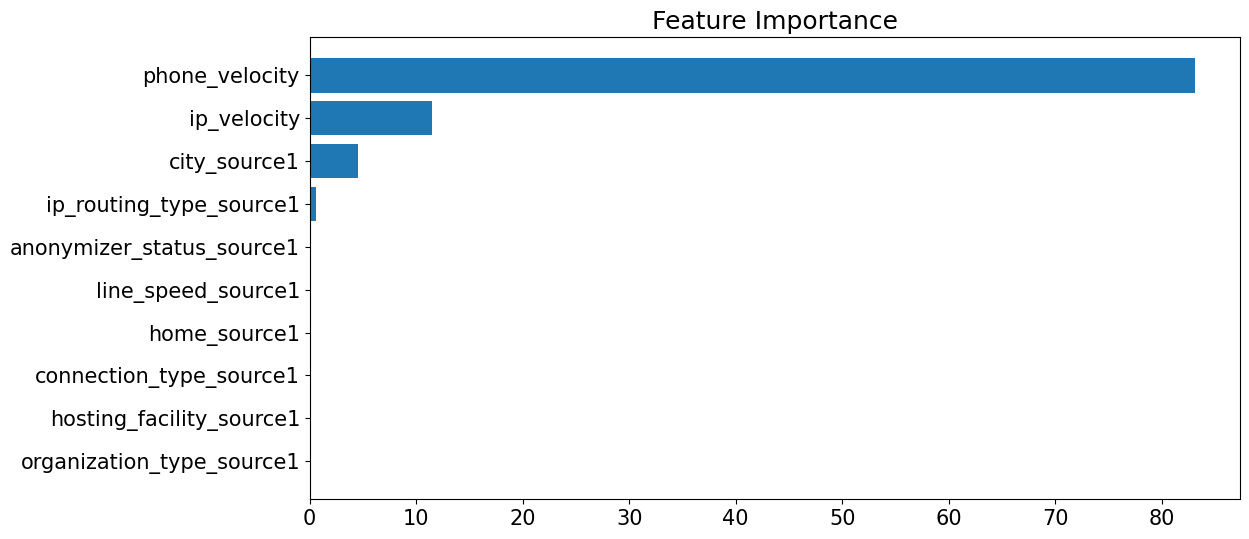

In [89]:
#plot tree-based (or Gini) importance 
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(src1_X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [90]:
#repeat for src2: 
categorical_features_indices = np.where(src2_x.dtypes != np.float)[0]
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(src2_X_train, src2_y_train,cat_features=categorical_features_indices,eval_set=(src2_X_test, src2_y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3838798	test: 0.3804238	best: 0.3804238 (0)	total: 11.3ms	remaining: 552ms
1:	learn: 0.3571944	test: 0.3539230	best: 0.3539230 (1)	total: 18.5ms	remaining: 445ms
2:	learn: 0.3337668	test: 0.3308826	best: 0.3308826 (2)	total: 21.8ms	remaining: 342ms
3:	learn: 0.3135930	test: 0.3108727	best: 0.3108727 (3)	total: 24.9ms	remaining: 287ms
4:	learn: 0.2964177	test: 0.2939832	best: 0.2939832 (4)	total: 28.6ms	remaining: 257ms
5:	learn: 0.2813224	test: 0.2791700	best: 0.2791700 (5)	total: 34.6ms	remaining: 254ms
6:	learn: 0.2688371	test: 0.2669613	best: 0.2669613 (6)	total: 37.8ms	remaining: 232ms
7:	learn: 0.2580320	test: 0.2563013	best: 0.2563013 (7)	total: 40.4ms	remaining: 212ms
8:	learn: 0.2487341	test: 0.2472725	best: 0.2472725 (8)	total: 44.1ms	remaining: 201ms
9:	learn: 0.2409633	test: 0.2397062	best: 0.2397062 (9)	total: 48.4ms	remaining: 194ms
10:	learn: 0.2346205	test: 0.2335491	best: 0.2335491 (10)	total: 52.3ms	remaining: 185ms
11:	learn: 0.2291386	test: 0.2282775	best

Text(0.5, 1.0, 'Feature Importance')

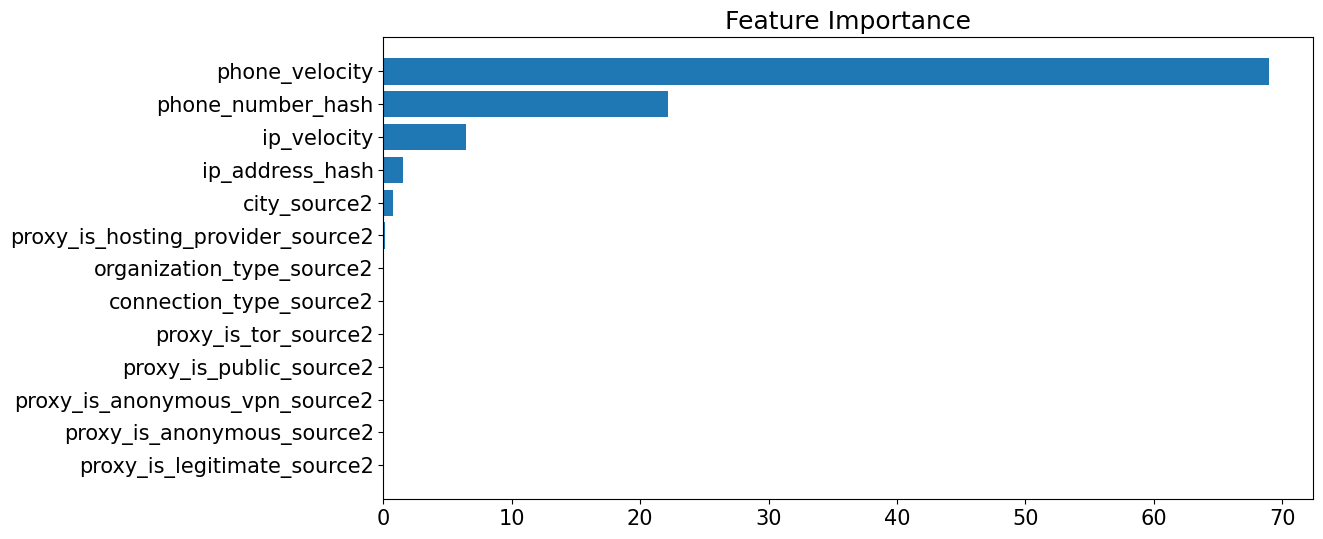

In [91]:
#plot tree-based (or Gini) importance 
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(src2_X_test.columns)[sorted_idx])
plt.title('Feature Importance')

#### Encode Variables 


Since most of the variables in our training data are categorical, we need to encode our variables in order to use them for fitting our models 
- Categorical encoding: 
- Since we have high cardinality categorical variables (e.g city), we can also try target encoding https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64#:%7E:text=%E2%80%9Cfeatures%20are%20replaced%20with%20a,over%20all%20the%20training%20data.%E2%80%9D

“features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.”

In [92]:
src1_x_cat = src1_x.drop(src1_x.describe().columns.to_list(), axis=1)
src1_x_cat.columns

Index(['city_source1', 'home_source1', 'connection_type_source1',
       'line_speed_source1', 'ip_routing_type_source1',
       'organization_type_source1', 'hosting_facility_source1',
       'anonymizer_status_source1'],
      dtype='object')

In [93]:
src2_x_cat = src2_x.drop(src2_x.describe().columns.to_list(), axis=1)
src2_x_cat.columns

Index(['city_source2', 'connection_type_source2', 'organization_type_source2',
       'ip_address_hash', 'phone_number_hash'],
      dtype='object')

In [107]:
from sklearn.preprocessing import LabelEncoder

#econde categorical variables in src1 
labelencoder = LabelEncoder()
for cat in src1_x_cat: 
    src1_X_train[cat + '_encode']=labelencoder.fit_transform(src1_X_train[cat])

src1_X_train=src1_X_train.drop(src1_x_cat, axis=1)

In [110]:
#econde categorical variables in src2
for cat in src2_x_cat: 
    src2_X_train[cat + '_encode']=labelencoder.fit_transform(src2_X_train[cat])

src2_X_train=src2_X_train.drop(src2_x_cat, axis=1)

#### SMOTE oversampling to balance data

<AxesSubplot: >

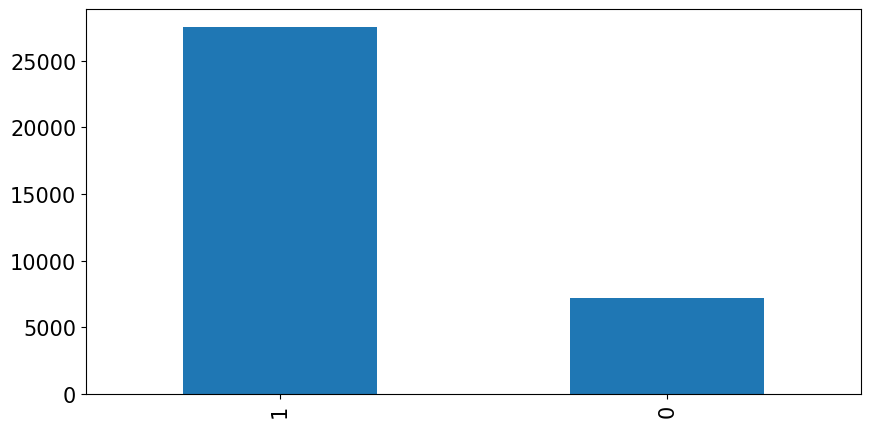

In [96]:
src1_y.value_counts()
src1_y.value_counts().plot(kind='bar')

In [115]:
#Oversampling the data
smote = SMOTE(random_state = 101)
src1_X_resampled_train, src1_y_resample_train = smote.fit_resample(src1_X_train, src1_y_train)

In [116]:
src2_X_resampled_train, src2_y_resampled_train = smote.fit_resample(src2_X_train, src2_y_train)

<AxesSubplot: >

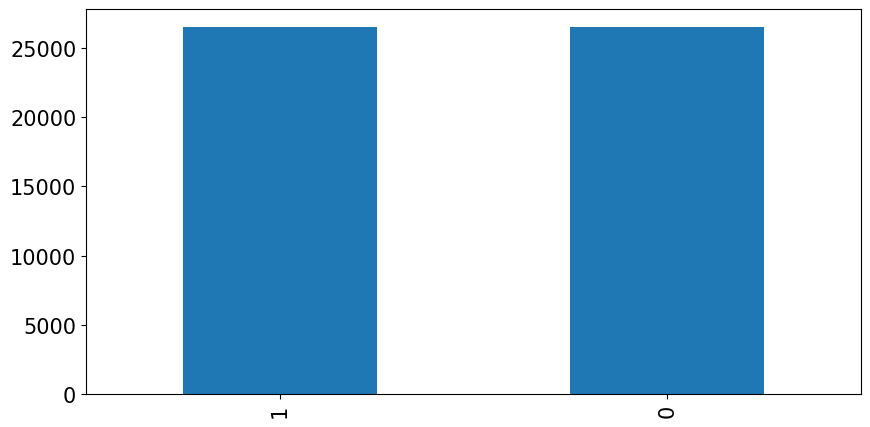

In [118]:
src2_y_resampled_train.value_counts().plot(kind='bar')

## Train/Fit models and evaluate on both datasets separately and experiment with combined dataset 

Before building a classification model, let’s build a Dummy Classifier to determine the ‘baseline’ performance. This answers the question — ‘What would be the success rate of the model, if one were simply guessing?’ The dummy classifier we are using will simply predict the majority class.

In [119]:
#Let's fit a baseline model
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(src1_X_resampled_train,src1_y_resampled_train)
y_pred = clf.predict(src1_X_test)


NameError: name 'src1_y_resampled_train' is not defined

In [103]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(src1_y_test,y_pred)))
print('Precision Score : ' + str(precision_score(src1_y_test,y_pred)))
print('Recall Score : ' + str(recall_score(src1_y_test,y_pred)))
print('F1 Score : ' + str(f1_score(src1_y_test,y_pred)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(src1_y_test,y_pred)))

Accuracy Score : 0.7888888888888889
Precision Score : 0.7888888888888889
Recall Score : 1.0
F1 Score : 0.8819875776397516
Confusion Matrix : 
[[   0 1463]
 [   0 5467]]


In [106]:
src1_X_train.dtypes

city_source1                 object
home_source1                 object
connection_type_source1      object
line_speed_source1           object
ip_routing_type_source1      object
organization_type_source1    object
hosting_facility_source1       bool
anonymizer_status_source1    object
ip_velocity                   int64
phone_velocity                int64
dtype: object

In [105]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(src1_X_train, src1_y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(src1_X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(src1_y_test,y_pred)))
print('Precision Score : ' + str(precision_score(src1_y_test,y_pred)))
print('Recall Score : ' + str(recall_score(src1_y_test,y_pred)))
print('F1 Score : ' + str(f1_score(src1_y_test,y_pred)))
confusion_matrix(src1_y_test,y_pred_acc)

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 554, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1104, in check_X_y
    X = check_array(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py", line 808, in check_array
    array = array.astype(new_dtype)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py", line 526, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 299, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 230, in astype_array
    values = astype_nansafe(values, dtype, copy=copy)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 170, in astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'lucknow'

--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 554, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1104, in check_X_y
    X = check_array(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py", line 808, in check_array
    array = array.astype(new_dtype)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py", line 526, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 299, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 230, in astype_array
    values = astype_nansafe(values, dtype, copy=copy)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 170, in astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'tbilisi'
